In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from numpy import trapz

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(df.columns[0], axis=1)
print(df.head())

# Define features and target
X = df.values[:, 1:6]
Y = df.values[:,0]

# Split Data in Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=101)

   returnLabel  totalAmount  c_0  c_1  c_2  c_3  c_4  c_5
0            0          240    1    0    3    1    3    0
1            0           79    0    0    1    0    0    0
2            0           24    0    0    1    1    0    0
3            0          504    0    3    0    0    1    2
4            0          190    1    0    1    1    2    0


### Logistic Regression

In [3]:
# Load Libary
from sklearn.linear_model import LogisticRegression

# Create new Logistic Regression
lr = LogisticRegression()

# Train the model
lr.fit(X_train,y_train)

D:\Programme\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Random Forest

In [4]:
# Load Libary
from sklearn.ensemble import RandomForestClassifier

# Create new Random Forest Classifier
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train the model
modelRf = rf.fit(X_train, y_train)

D:\Programme\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### ROC

In [5]:
# For Logistic Regression
tplr = lr.predict_proba(X_test)[:,1]
fplr, tplr, threshold = roc_curve(y_test, tplr)

# For Random Forest
tprf = rf.predict_proba(X_test)[:,1]
fprf, tprf, threshold = roc_curve(y_test, tprf)

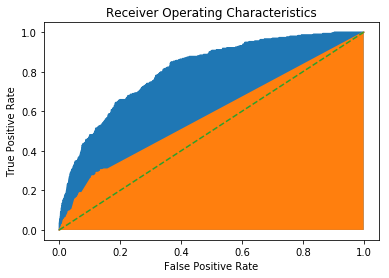

In [6]:
# Represent ROC curve in the diagram
plt.title("Receiver Operating Characteristics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fplr, tplr)
plt.plot(fprf, tprf)
plt.plot([0, 1], ls="--")
plt.fill_between(fplr,tplr)
plt.fill_between(fprf, tprf)
plt.show()

In [7]:
# Calculate the area under the ROC Curves
arealr = trapz(tplr, fplr)
print("Area ROC (LogisticRegression): ", arealr)

arearf = trapz(tprf, fprf)
print("Area ROC (RandomForest): ", arearf)

Area ROC (LogisticRegression):  0.8096726815813715
Area ROC (RandomForest):  0.5803434643741254
